In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [38]:
df = pd.read_csv("dataset.csv")

In [39]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

##### Ans: Load the dataset from the CSV file and check for any missing values using the isnull() function. For the numerical columns, fill the missing (NaN) values with the mean of each respective column. For the sex column, fill missing values with the most frequent value (mode). Finally, verify that all missing values have been addressed.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [48]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.422408,1.969027,14.020657,1115.961772
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,43.876855,17.300000,197.000000,4050.000000
75%,48.400000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,15000.000000


In [50]:
df.shape

(344, 7)

In [40]:
df.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [41]:
for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df[column] = df[column].fillna(df[column].mean())

In [42]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [43]:
df['sex'].value_counts()

sex
male       180
female     162
unknown      2
Name: count, dtype: int64

### Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [46]:
gentoo_penguins = df[df['species'] == 'Gentoo']
avg_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()
print(f"The average body mass for Gentoo penguins is {avg_body_mass_gentoo:.2f}")

The average body mass for Gentoo penguins is 5126.81


### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

##### Ans: To analyze the distribution of penguin species' bill measurements (bill_length_mm and bill_depth_mm). First, we use box plots to visually compare how these measurements vary across species. Then, we calculate skewness and kurtosis to understand the shape of the distributions. Skewness tells us if the data is more spread out on one side (asymmetry), while kurtosis indicates whether the distribution has heavy tails or is more flat. By comparing these values for each species, we can see how the bill characteristics differ in both shape and spread.

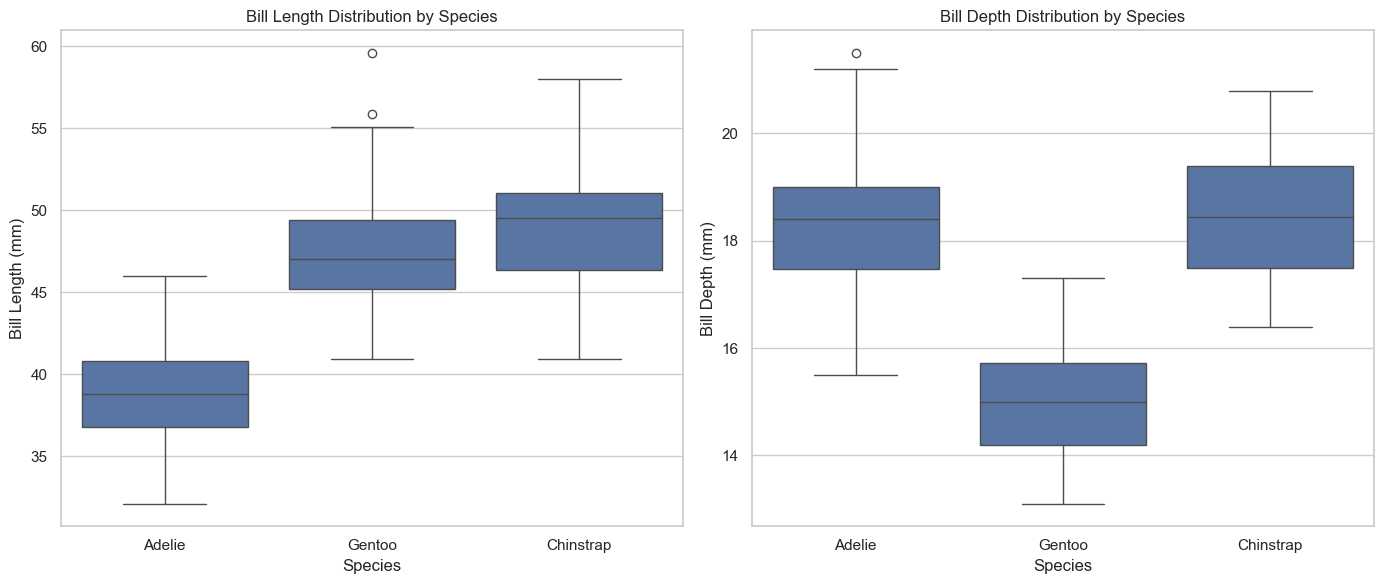

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Bill Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Bill Depth Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()

In [53]:
results = {}
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    bill_length_skew = skew(species_data['bill_length_mm'].dropna())
    bill_length_kurt = kurtosis(species_data['bill_length_mm'].dropna())
    bill_depth_skew = skew(species_data['bill_depth_mm'].dropna())
    bill_depth_kurt = kurtosis(species_data['bill_depth_mm'].dropna())
    results[species] = {
        'bill_length_mm': {'skewness': bill_length_skew, 'kurtosis': bill_length_kurt},
        'bill_depth_mm': {'skewness': bill_depth_skew, 'kurtosis': bill_depth_kurt},
    }

In [54]:
for species, metrics in results.items():
    print(f"{species}:\n  Bill Length: Skewness = {metrics['bill_length_mm']['skewness']:.2f}, "
          f"Kurtosis = {metrics['bill_length_mm']['kurtosis']:.2f}\n  Bill Depth: Skewness = {metrics['bill_depth_mm']['skewness']:.2f}, "
          f"Kurtosis = {metrics['bill_depth_mm']['kurtosis']:.2f}\n")


Adelie:
  Bill Length: Skewness = 0.16, Kurtosis = -0.23
  Bill Depth: Skewness = 0.33, Kurtosis = -0.10

Gentoo:
  Bill Length: Skewness = 0.71, Kurtosis = 1.15
  Bill Depth: Skewness = 0.33, Kurtosis = -0.61

Chinstrap:
  Bill Length: Skewness = -0.10, Kurtosis = -0.12
  Bill Depth: Skewness = 0.01, Kurtosis = -0.90



### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

##### Ans: Outliers were detected only in the body_mass_g feature, with unusually high values for an Adelie penguin (15,000g), a Gentoo penguin (12,000g), and a Chinstrap penguin (10,000g). No outliers were found in bill_length_mm, bill_depth_mm, or flipper_length_mm. These outliers in body mass suggest unusually large penguins compared to the typical range, which can be seen as distinct points in the box plot visualization.

In [55]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [56]:
outliers_bill_length = detect_outliers_iqr(df, 'bill_length_mm')
outliers_bill_depth = detect_outliers_iqr(df, 'bill_depth_mm')
outliers_flipper_length = detect_outliers_iqr(df, 'flipper_length_mm')
outliers_body_mass = detect_outliers_iqr(df, 'body_mass_g')

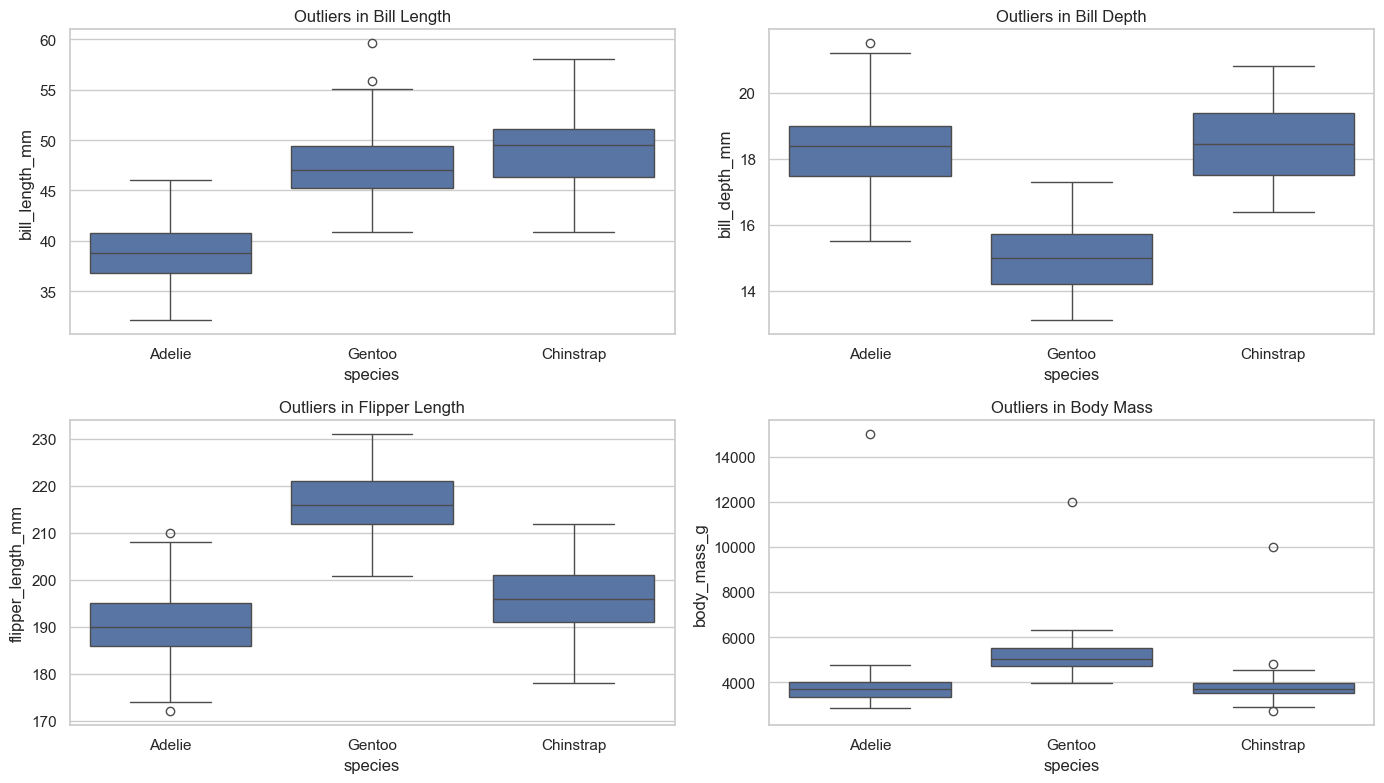

In [57]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Outliers in Bill Length')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Outliers in Bill Depth')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Outliers in Flipper Length')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Outliers in Body Mass')

plt.tight_layout()
plt.show()


In [58]:
print("Outliers in Bill Length:")
print(outliers_bill_length)

print("\nOutliers in Bill Depth:")
print(outliers_bill_depth)

print("\nOutliers in Flipper Length:")
print(outliers_flipper_length)

print("\nOutliers in Body Mass:")
print(outliers_body_mass)

Outliers in Bill Length:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

Outliers in Bill Depth:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

Outliers in Flipper Length:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

Outliers in Body Mass:
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73      Adelie  Torgersen            45.8           18.9              197.0   
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


### Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

##### Ans: The results of the PCA indicate that Principal Component 1 (PC1) captures 62% of the total variance in the dataset, highlighting its importance in representing the underlying structure of the data. Principal Component 2 (PC2) explains an additional 20% of the variance, which, although less than PC1, still contributes significantly to the overall analysis. Together, these two components account for 82% of the total variance, effectively summarizing a substantial portion of the original dataset's information. This dimensionality reduction facilitates easier visualization and interpretation of the data while helping to mitigate potential issues associated with the curse of dimensionality.

In [60]:
numerical_features = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

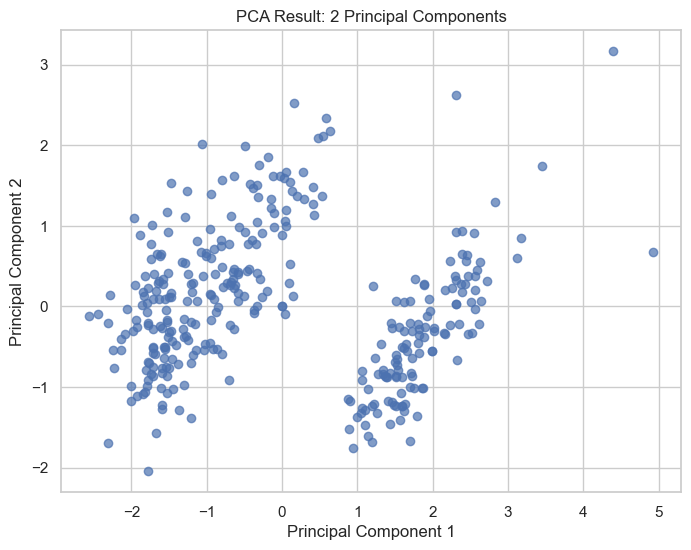

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA Result: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [62]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")


Explained variance by PC1: 0.62
Explained variance by PC2: 0.20


### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

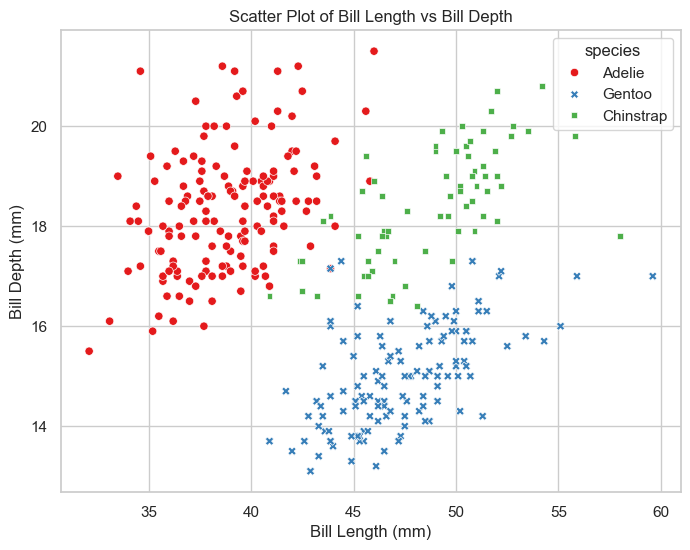

In [63]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', style='species', palette='Set1')
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

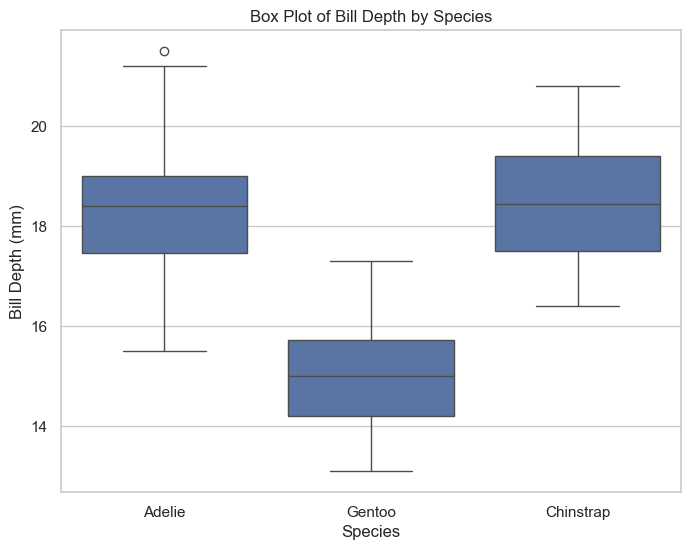

In [64]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Box Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

C:\Users\dvaru\AppData\Local\Temp\ipykernel_7048\2964955581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='bill_depth_mm', data=df, inner='quartile', palette='pastel')


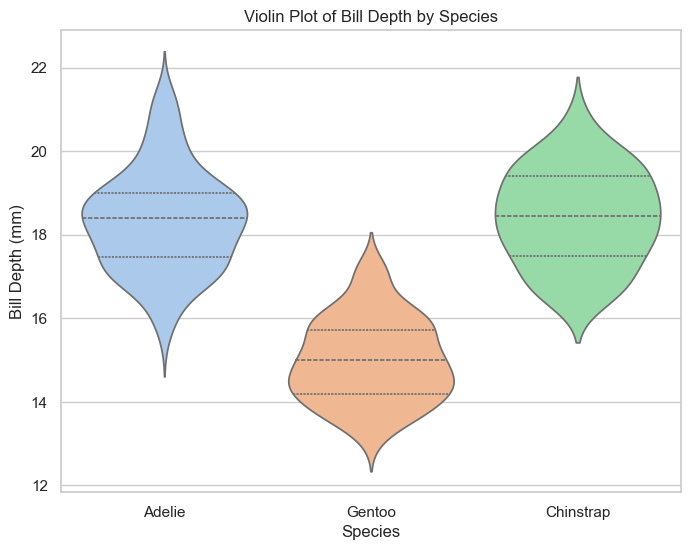

In [65]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='bill_depth_mm', data=df, inner='quartile', palette='pastel')
plt.title('Violin Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

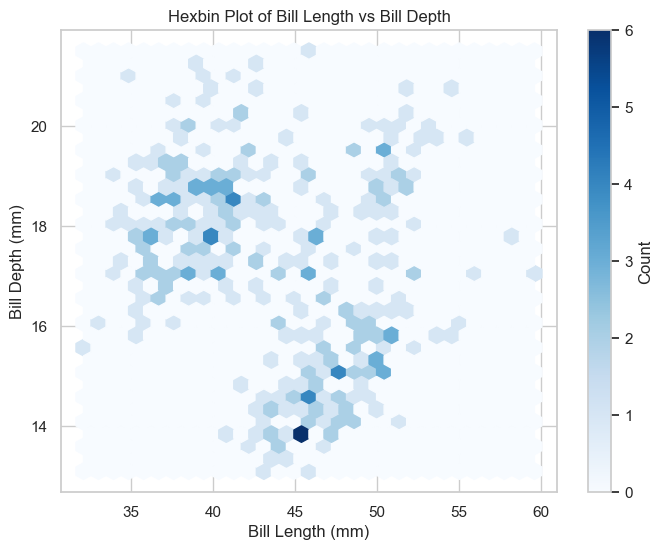

In [66]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

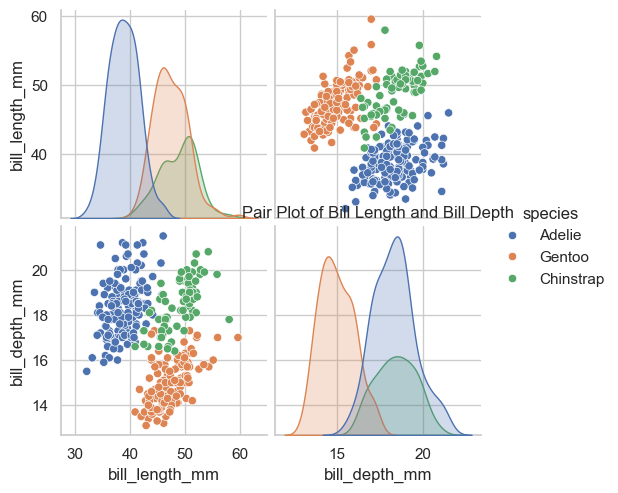

In [67]:
# Pair Plot
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm'], hue='species', diag_kind='kde')
plt.title('Pair Plot of Bill Length and Bill Depth')
plt.show()

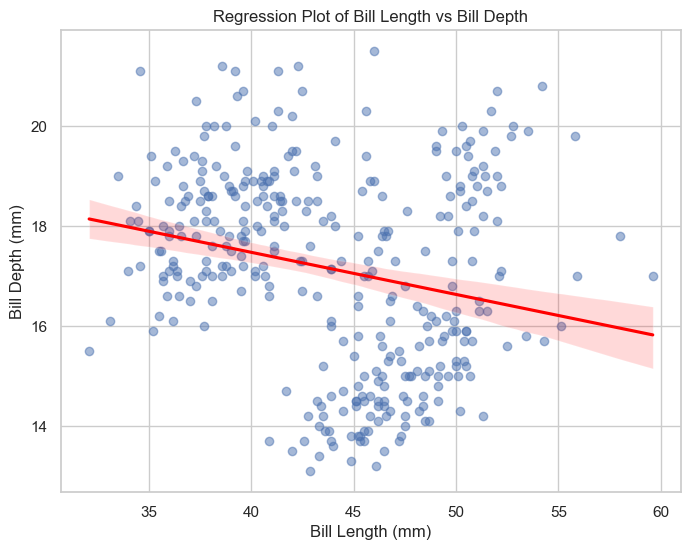

In [68]:
# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Regression Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

C:\Users\dvaru\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dvaru\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dvaru\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dvaru\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dvaru\AppData\Roami

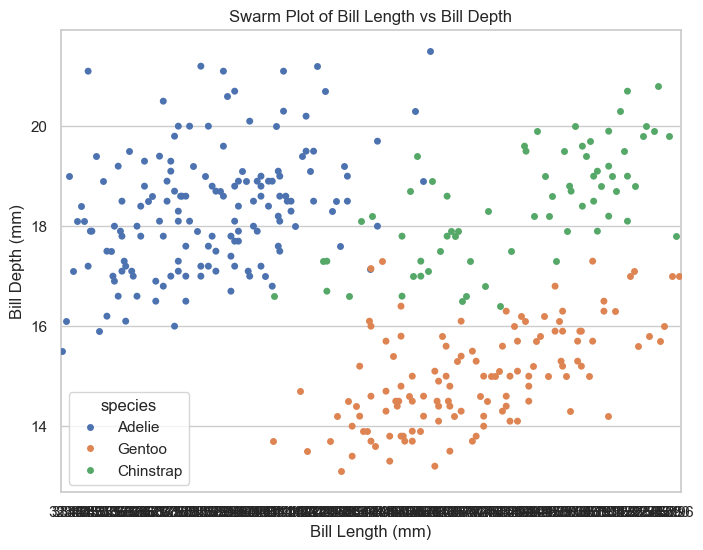

In [69]:
# Swarm Plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', dodge=True)
plt.title('Swarm Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

### Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)


In [70]:
max_flipper_length = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


### Q8: Perform z-score normalization on this dataset. (code)

In [75]:
normalized_features = numerical_features.apply(zscore)
normalized_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)
print(normalized_df)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         -0.882230       0.787743          -1.422488    -0.470213
1         -0.808355       0.126556          -1.065352    -0.425343
2         -0.660604       0.431719          -0.422507    -0.918910
3          0.000000       0.000000           0.000000     0.000000
4         -1.325483       1.092905          -0.565361    -0.739431
..              ...            ...                ...          ...
339        2.202069       1.347208           0.434620    -0.245865
340       -0.069601       0.482580           0.077484    -0.784301
341        1.056999       0.533440          -0.565361    -0.447778
342        1.278626       0.940324           0.648902    -0.156125
343        1.167813       0.787743          -0.208225    -0.447778

[344 rows x 4 columns]
